In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, ARDRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('Roblox.csv')

In [5]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-11,74.930000,77.779999,70.129997,73.900002,73.900002,59629300
1,2021-03-12,72.470001,72.959999,69.110001,69.699997,69.699997,19714700
2,2021-03-15,70.019997,74.059998,66.250000,72.150002,72.150002,19549800
3,2021-03-16,73.730003,78.000000,73.180000,77.000000,77.000000,30274400
4,2021-03-17,76.029999,79.099998,74.889999,76.790001,76.790001,10054100
5,2021-03-18,76.000000,77.000000,66.800003,67.300003,67.300003,9627400
6,2021-03-19,69.470001,72.699997,68.080002,70.500000,70.500000,6776500
7,2021-03-22,71.809998,72.489998,69.540001,70.000000,70.000000,4238500
8,2021-03-23,70.099998,71.750000,67.629997,68.000000,68.000000,4456000
9,2021-03-24,69.970001,70.000000,64.010002,64.500000,64.500000,5460000


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,57.255086,59.117755,55.400136,57.273304,57.273304,1.704303e+07
std,24.847962,25.638251,23.921180,24.745580,24.745580,1.354966e+07
min,21.920000,25.670000,21.650000,23.190001,23.190001,2.420200e+06
25%,37.745000,38.642501,36.362499,37.504999,37.504999,8.203150e+06
50%,45.340000,46.572500,44.137499,45.445000,45.445000,1.383645e+07
75%,78.241251,80.199999,76.736251,77.937498,77.937498,2.081752e+07
max,140.735001,141.600006,128.539993,134.720001,134.720001,1.057943e+08


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

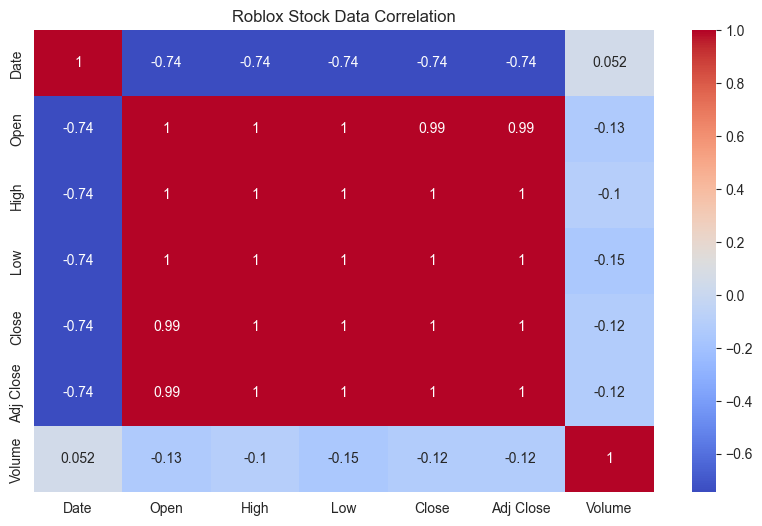

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Roblox Stock Data Correlation')
plt.show()

<Axes: ylabel='Density'>

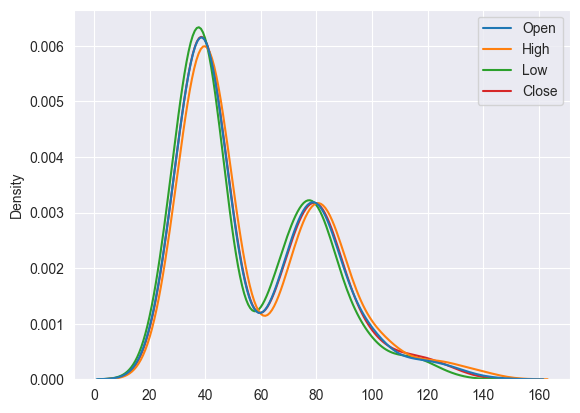

In [10]:
sns.kdeplot(data = df[['Open', 'High', 'Low', 'Close']])

<Axes: xlabel='Open', ylabel='Count'>

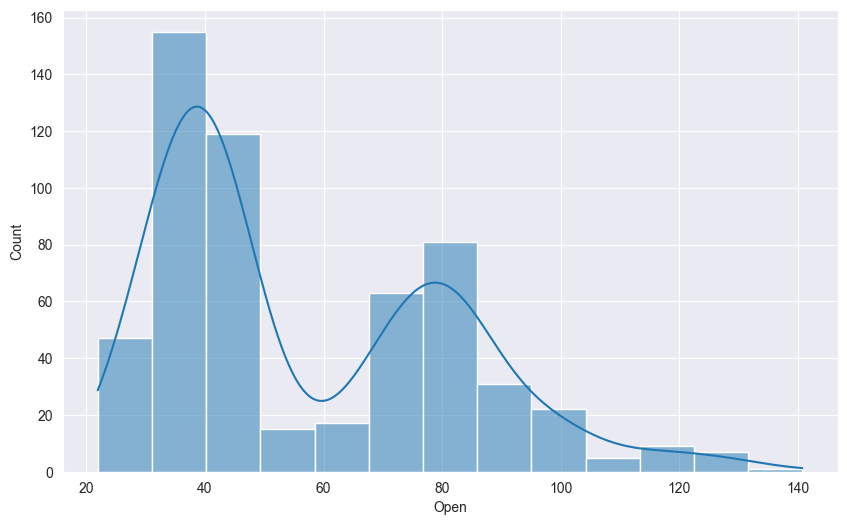

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Open', kde=True)

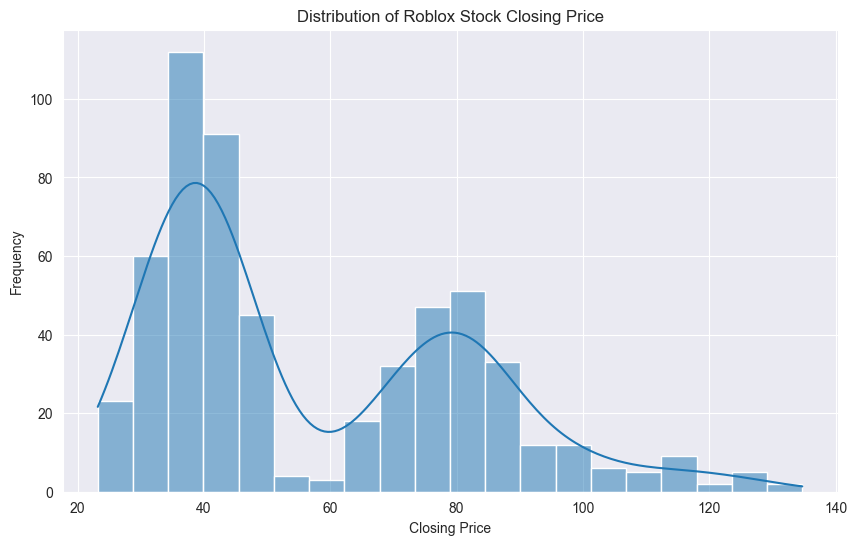

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Close', bins=20, kde=True)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Roblox Stock Closing Price')
plt.show()

In [13]:
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = [
    LinearRegression(), Ridge(), Lasso(), 
    ElasticNet(), ARDRegression()
]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'ARD Regression']

In [16]:
models_train = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    models_train.append((name, mse, r2, rmse))

In [17]:
model_df = pd.DataFrame(models_train, columns=['Model', 'MSE', 'R2', 'RMSE'])
model_df

,Model,MSE,R2,RMSE
0,Linear Regression,1.215512,0.998001,1.102502
1,Ridge,1.215714,0.998000,1.102594
2,Lasso,2.335484,0.996158,1.528229
3,Elastic Net,2.034547,0.996653,1.426375
4,ARD Regression,1.216851,0.997998,1.103110


In [18]:
from sklearn.ensemble import VotingRegressor
ensemble = VotingRegressor(estimators=[
    ('Ridge', Ridge()), ('Lasso', Lasso()), ('Elastic Net', ElasticNet()), 
    ('ARD', ARDRegression()), ('Linear Regression', LinearRegression())])
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Ensemble MSE: {mse:.2f}, R2: {r2:.2f}')

Ensemble MSE: 1.40, R2: 1.00


In [19]:
from sklearn.model_selection import cross_val_score
models_val = []
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores = np.sqrt(-cv_scores)
    models_val.append({'Model': name, 'Mean CV Score': cv_scores.mean(), 'CV Scores': cv_scores})

models_val_df = pd.DataFrame(models_val)
models_val_df

,Model,Mean CV Score,CV Scores
0,Linear Regression,1.103504,"[1.2930597309599352, 1.763286404757687, 1.0918..."
1,Ridge,1.103602,"[1.2930634038484028, 1.7642337158724997, 1.091..."
2,Lasso,1.466823,"[1.8051872162440146, 2.6209892787643856, 1.334..."
3,Elastic Net,1.389374,"[1.7376664615874886, 2.519542582816651, 1.2311..."
4,ARD Regression,1.090339,"[1.294644394817515, 1.7536134389424594, 1.0438..."


In [20]:
cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = np.sqrt(-cv_scores)
print(f'Cross Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross Validation Scores: [1.38302585 1.97238651 1.09175653 0.8233272  0.53894015]
Mean CV Score: 1.1618872484048548
